In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
datas = fetch_california_housing()

In [3]:
datas.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(datas["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
dataset = pd.DataFrame(datas["data"], columns=datas["feature_names"])

In [6]:
dataset.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
target = pd.DataFrame(datas["target"], columns=datas["target_names"])

In [9]:
target.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [10]:
target[target["MedHouseVal"] > 4.99]

,MedHouseVal
89,5.00001
459,5.00001
493,5.00001
494,5.00001
509,5.00001
...,...
20422,5.00001
20426,5.00001
20427,5.00001
20436,5.00001


<AxesSubplot:ylabel='Count'>

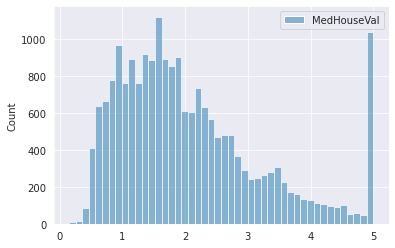

In [11]:
sns.set_style("darkgrid")
sns.histplot(target)

<AxesSubplot:xlabel='MedHouseVal'>

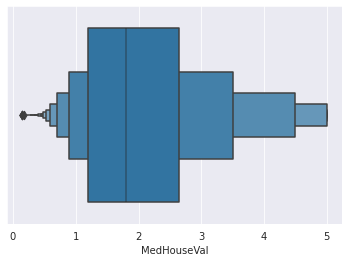

In [31]:
sns.boxenplot(x="MedHouseVal", data=target")

In [12]:
dataset_joined = dataset.join(target)

<AxesSubplot:>

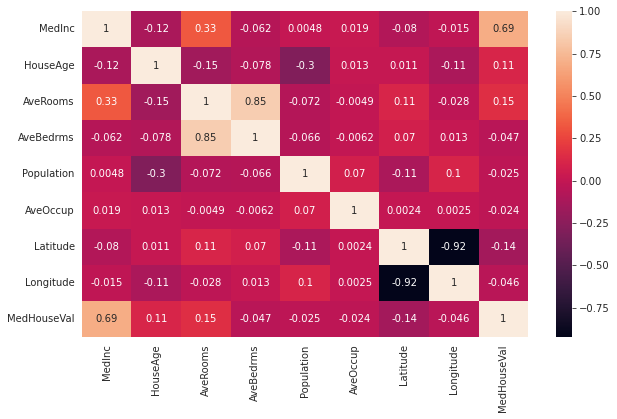

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset_joined.corr(), annot=True)

In [14]:
dataset_joined.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
x = dataset_joined.drop("MedHouseVal", axis=1)
y = dataset_joined["MedHouseVal"]

## Padronizando os dados das features

In [16]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns=datas["feature_names"])

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nx_scaled = scaler.fit_transform(x)\n\nx = pd.DataFrame(x_scaled, columns=datas["feature_names"])'

## Separando os dados em treinos e testes

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

## Treinando e testando o modelo(LinearRegression)

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)


In [19]:
y_pred

array([3.1519632 , 5.51522297, 1.63359669, ..., 1.09831725, 0.89065921,
       2.21987232])

## Avaliando a precisão do modelo(LinearRegression)

In [20]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.21964545714366257


## Treinando e testando o modelo(Suport Vector Machine)

In [21]:
from sklearn.svm import SVR

model = SVR()

model.fit(x_train, y_train)

SVR()

In [22]:
y_pred_svm = model.predict(x_test)

In [23]:
y_pred

array([3.1519632 , 5.51522297, 1.63359669, ..., 1.09831725, 0.89065921,
       2.21987232])

In [24]:
r2_score(y_test, y_pred)

0.21964545714366257

In [49]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=15)

model_tree.fit(x_train, y_train)

y_pred_tree = model_tree.predict(x_test)

In [47]:
y_pred_tree

array([3.35446402, 4.55395579, 1.36316633, ..., 1.36316633, 0.94111525,
       2.95747821])

In [50]:
r2_score(y_test, y_pred_tree)

0.5730489147103441